In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [4]:
from imutils import paths
import keras.backend as K

In [5]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import array

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

Image uploading

In [ ]:
imagepaths = list(paths.list_images("/Users/tharun/Desktop/tn/gb"))

In [ ]:
print(len(imagepaths))

68861


In [ ]:
# data = []
# labels = []
# for images in tqdm(imagepaths):
#     label = images.split(os.path.sep)[-2]
#     image =cv2.imread(images)
#     image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     image =cv2.resize(image, (256,256))
#     image = np.asarray(image)
#     image = np.reshape(image,(256,768))
#     data.append(image)
#     labels.append(label)

In [ ]:
testpaths = list(paths.list_images("/Users/tharun/Desktop/mlproject/Garbage Dataset/test"))

In [ ]:
from tqdm import tqdm

In [ ]:
# testdata = []
# testlabels = []
# for images in tqdm(testpaths):
#     label = images.split(os.path.sep)[-2]
#     image =cv2.imread(images)
#     image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     image =cv2.resize(image, (30,30))
#     image = np.asarray(image)
#     image = np.reshape(image,(30,90))
#     testdata.append(image)
#     testlabels.append(label)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# labels = lb.fit_transform(labels)
# testlabels = lb.fit_transform(testlabels)

# **If having pickle file**

In [8]:
import pickle
data = pickle.load(open('/content/drive/MyDrive/Garbage/traindata.pkl','rb'))
labels = pickle.load(open('/content/drive/MyDrive/Garbage/trainlabels.pkl','rb'))
testdata = pickle.load(open('/content/drive/MyDrive/Garbage/testdata.pkl','rb'))
testlabels = pickle.load(open('/content/drive/MyDrive/Garbage/testlabels.pkl','rb'))

In [8]:
#for inclass
import pickle
data = pickle.load(open('/content/drive/MyDrive/Garbage/traindata.pkl','rb'))
labels = pickle.load(open('/content/drive/MyDrive/Garbage/trainlabels.pkl','rb'))
itestdata = pickle.load(open('/content/drive/MyDrive/Garbage/itestdata.pkl','rb'))
itestlabels = pickle.load(open('/content/drive/MyDrive/Garbage/itestlabels.pkl','rb'))

In [9]:
idat = []
for i in data:
    i=np.reshape(i,(32,96))
    idat.append(i)
data = idat

In [10]:
idat = []
for i in itestdata:
    i=np.reshape(i,(32,96))
    idat.append(i)
itestdata = idat

In [11]:
mapping = ['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']

In [12]:
def index(x):
    for i in range(9):
        if(mapping[i] == x):
            return i;
    return -1;

In [13]:
ilabels = []
for l in labels:
    ilabels.append(index(l))
labels = ilabels

In [14]:
ilabels = []
for l in itestlabels:
    ilabels.append(index(l))
itestlabels = ilabels

In [15]:
 def prep_pixels(train, test):
 	# convert from integers to floats
 	train_norm = np.array(train).astype('float32')
 	test_norm = np.array(test).astype('float32')
 	# normalize to range 0-1
 	train_norm = train_norm / 255.0
 	test_norm = test_norm/ 255.0
 	# return normalized images
 	return train_norm, test_norm

data, itestdata = prep_pixels(data, itestdata)

In [17]:
data = np.asarray(data)
labels = np.asarray(labels)
itestdata=np.asarray(itestdata)
itestlabels=np.asarray(itestlabels)

In [18]:
print(data.shape)
print(itestdata.shape)
print(labels.shape)
print(itestlabels.shape)

(104040, 32, 96)
(69, 32, 96)
(104040,)
(69,)


In [18]:
testdata.shape

(26010, 32, 96)

# **Creating a model and training**







In [ ]:

model1 = models.Sequential()
model1.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model1.add(layers.Dropout(0.15))
model1.add(layers.LSTM(50, activation = 'tanh',recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(50,activation = 'relu'))
model1.add(layers.Dropout(0.04))
model1.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32, 50)            29400     
                                                                 
 dropout_3 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_5 (Dropout)         (None, 50)               

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/Garbage/model/best_model_8l_normal1.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model1.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.44664, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1.h5
3252/3252 - 30s - loss: 1.6292 - accuracy: 0.4025 - val_loss: 1.4985 - val_accuracy: 0.4466 - 30s/epoch - 9ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.44664 to 0.49458, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1.h5
3252/3252 - 23s - loss: 1.4548 - accuracy: 0.4743 - val_loss: 1.3764 - val_accuracy: 0.4946 - 23s/epoch - 7ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.49458 to 0.54410, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1.h5
3252/3252 - 25s - loss: 1.3558 - accuracy: 0.5155 - val_loss: 1.2794 - val_accuracy: 0.5441 - 25s/epoch - 8ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.54410 to 0.55186, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1.h5
3252/3252 - 23s - loss: 1.2860 - accuracy: 0.5430 - val_loss: 1.2515 -

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Garbage/csv/LSTM01.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

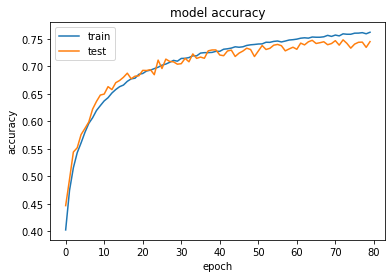

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model1.save('/content/drive/MyDrive/Garbage/converged_models/LSTM01.h5')

In [ ]:
model2 = models.Sequential()
model2.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model2.add(layers.Dropout(0.15))
model2.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model2.add(layers.Dropout(0.25))
model2.add(layers.LSTM(50, activation = 'tanh',recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model2.add(layers.Dropout(0.35))
model2.add(layers.Flatten())
model2.add(layers.Dense(50,activation = 'tanh'))
model2.add(layers.Dropout(0.04))
model2.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 50)            29400     
                                                                 
 dropout (Dropout)           (None, 32, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 flatten (Flatten)           (None, 50)                0

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/Garbage/model/best_model_8l_normal2.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model2.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.45421, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2.h5
3252/3252 - 39s - loss: 1.6236 - accuracy: 0.4002 - val_loss: 1.4877 - val_accuracy: 0.4542 - 39s/epoch - 12ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.45421 to 0.51126, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2.h5
3252/3252 - 30s - loss: 1.4633 - accuracy: 0.4729 - val_loss: 1.3804 - val_accuracy: 0.5113 - 30s/epoch - 9ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.51126 to 0.54714, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2.h5
3252/3252 - 30s - loss: 1.3615 - accuracy: 0.5167 - val_loss: 1.2839 - val_accuracy: 0.5471 - 30s/epoch - 9ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.54714 to 0.57124, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2.h5
3252/3252 - 30s - loss: 1.2784 - accuracy: 0.5494 - val_loss: 1.2040 

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Garbage/csv/LSTM02.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

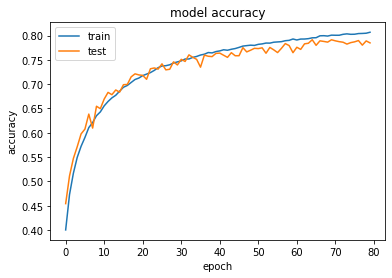

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model2.save('/content/drive/MyDrive/Garbage/converged_models/LSTM02.h5')

In [19]:
model3 = models.Sequential()
model3.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model3.add(layers.Dropout(0.15))
model3.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model3.add(layers.Dropout(0.25))
model3.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model3.add(layers.Dropout(0.35))
model3.add(layers.LSTM(50, activation = 'tanh',recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model3.add(layers.Dropout(0.45))
model3.add(layers.Flatten())
model3.add(layers.Dense(50,activation = 'relu'))
model3.add(layers.Dropout(0.04))
model3.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 50)            29400     
                                                                 
 dropout (Dropout)           (None, 32, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/Garbage/model/best_model_8l_normal3.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model3.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.46659, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3.h5
3252/3252 - 46s - loss: 1.6425 - accuracy: 0.3986 - val_loss: 1.4972 - val_accuracy: 0.4666 - 46s/epoch - 14ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.46659 to 0.52153, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3.h5
3252/3252 - 39s - loss: 1.4762 - accuracy: 0.4759 - val_loss: 1.3563 - val_accuracy: 0.5215 - 39s/epoch - 12ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.52153 to 0.54125, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3.h5
3252/3252 - 38s - loss: 1.3583 - accuracy: 0.5229 - val_loss: 1.2890 - val_accuracy: 0.5413 - 38s/epoch - 12ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.54125 to 0.56836, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3.h5
3252/3252 - 38s - loss: 1.2776 - accuracy: 0.5525 - val_loss: 1.203

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Garbage/csv/LSTM03.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

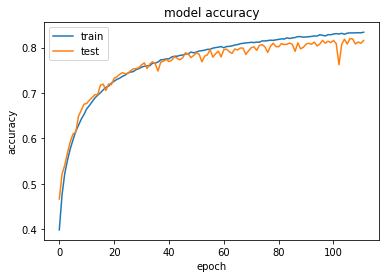

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model3.save('/content/drive/MyDrive/Garbage/converged_models/LSTM03.h5')

In [20]:
saved_model = models.load_model('/content/drive/MyDrive/1,3,4/model/best_model_4layers.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(data, labels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 64s - loss: 0.3241 - accuracy: 0.8866 - 64s/epoch - 20ms/step
813/813 - 15s - loss: 0.5458 - accuracy: 0.8197 - 15s/epoch - 19ms/step
Train: 0.887, Test: 0.820


In [22]:
from sklearn.metrics import confusion_matrix
#Generate predictions with the model using our X values
y_pred_arr = saved_model.predict(testdata)

y_pred = []
def intonum(pred):
  res = 0
  max = -1
  for i in range(9):
    if pred[i] > max:
      max = pred[i]
      res = i
  return res

for i in y_pred_arr:
  y_pred.append(intonum(i))

y_pred_arr = np.asarray(y_pred_arr)

y_true = testlabels
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[1892   93   93   14   14  184   79   33   23]
 [ 107 1887   33   25    7   41   76   63   12]
 [ 121   43 4012   20    6  243   49  139   28]
 [  32   50   22  619    4   60  100   16    5]
 [  40    9    8    6  511   16   33    8    1]
 [ 103   29  132   19    8 4356  230  175   18]
 [ 124   71  139   48   45  259 3919  214   30]
 [  57   64  105    8    5  227  315 3368   19]
 [  29   44   18   10    2   85   49   52  757]]


In [23]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


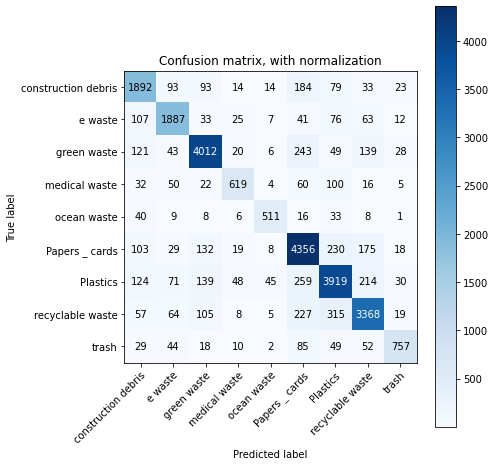

In [24]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(testlabels, y_pred)

#Defining the class labels
class_names=['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(testlabels, y_pred, classes = class_names, title='Confusion matrix, with normalization')

In [ ]:
class attention(layers.Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
model1at = models.Sequential()
model1at.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model1at.add(layers.Dropout(0.15))
model1at.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model1at.add(attention())
model1at.add(layers.Dropout(0.25))
model1at.add(layers.Flatten())
model1at.add(layers.Dense(50,activation = 'tanh'))
model1at.add(layers.Dropout(0.04))
model1at.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model1at.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model1at.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 32, 50)            29400     
                                                                 
 dropout_23 (Dropout)        (None, 32, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 32, 50)            20200     
                                                                 
 attention_1 (attention)     (None, 50)                82        
                                                                 
 dropout_24 (Dropout)        (None, 50)                0         
                                                                 
 flatten_6 (Flatten)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 50)               

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/Garbage/model/best_model_8l_normal1at.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model1at.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.47839, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1at.h5
3252/3252 - 29s - loss: 1.5911 - accuracy: 0.4185 - val_loss: 1.4495 - val_accuracy: 0.4784 - 29s/epoch - 9ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.47839 to 0.53126, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1at.h5
3252/3252 - 24s - loss: 1.4093 - accuracy: 0.4970 - val_loss: 1.3114 - val_accuracy: 0.5313 - 24s/epoch - 7ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.53126 to 0.56313, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1at.h5
3252/3252 - 26s - loss: 1.3068 - accuracy: 0.5364 - val_loss: 1.2295 - val_accuracy: 0.5631 - 26s/epoch - 8ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.56313 to 0.58520, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal1at.h5
3252/3252 - 24s - loss: 1.2416 - accuracy: 0.5609 - val_loss: 

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Garbage/csv/LSTM04.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

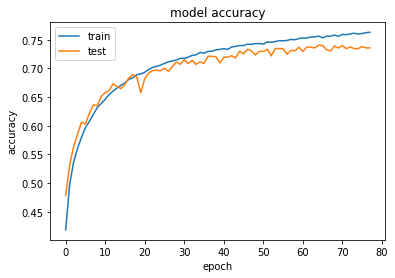

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model1at.save('/content/drive/MyDrive/Garbage/converged_models/LSTM04.h5')

In [ ]:
model2at = models.Sequential()
model2at.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model2at.add(layers.Dropout(0.15))
model2at.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model2at.add(layers.Dropout(0.25))
model2at.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model2at.add(attention())
model2at.add(layers.Dropout(0.35))
model2at.add(layers.Flatten())
model2at.add(layers.Dense(50,activation = 'tanh'))
model2at.add(layers.Dropout(0.04))
model2at.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model2at.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model2at.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 32, 50)            29400     
                                                                 
 dropout_16 (Dropout)        (None, 32, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 32, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 32, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 32, 50)            20200     
                                                                 
 attention_1 (attention)     (None, 50)                82        
                                                                 
 dropout_18 (Dropout)        (None, 50)               

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/Garbage/model/best_model_8l_normal2at.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model2at.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.48708, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2at.h5
3252/3252 - 38s - loss: 1.5972 - accuracy: 0.4140 - val_loss: 1.4311 - val_accuracy: 0.4871 - 38s/epoch - 12ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.48708 to 0.52299, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2at.h5
3252/3252 - 32s - loss: 1.4026 - accuracy: 0.5009 - val_loss: 1.3371 - val_accuracy: 0.5230 - 32s/epoch - 10ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.52299 to 0.56348, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2at.h5
3252/3252 - 33s - loss: 1.2945 - accuracy: 0.5425 - val_loss: 1.2295 - val_accuracy: 0.5635 - 33s/epoch - 10ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.56348 to 0.59208, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal2at.h5
3252/3252 - 32s - loss: 1.2196 - accuracy: 0.5706 - val_los

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Garbage/csv/LSTM05.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

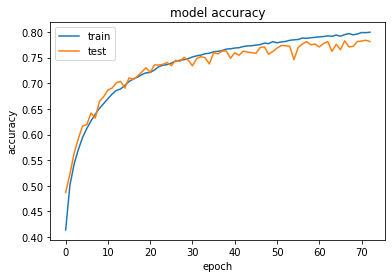

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model2at.save('/content/drive/MyDrive/Garbage/converged_models/LSTM05.h5')

In [ ]:
model3at = models.Sequential()
model3at.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model3at.add(layers.Dropout(0.15))
model3at.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model3at.add(layers.Dropout(0.25))
model3at.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model3at.add(layers.Dropout(0.35))
model3at.add(layers.LSTM(50, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model3at.add(attention())
model3at.add(layers.Dropout(0.45))
model3at.add(layers.Flatten())
model3at.add(layers.Dense(50,activation = 'tanh'))
model3at.add(layers.Dropout(0.04))
model3at.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model3at.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model3at.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 50)            29400     
                                                                 
 dropout (Dropout)           (None, 32, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32, 50)            2

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/Garbage/model/best_model_8l_normal3at.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model3at.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.47243, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3at.h5
3252/3252 - 49s - loss: 1.6346 - accuracy: 0.3989 - val_loss: 1.4671 - val_accuracy: 0.4724 - 49s/epoch - 15ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.47243 to 0.54129, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3at.h5
3252/3252 - 37s - loss: 1.4289 - accuracy: 0.4932 - val_loss: 1.3007 - val_accuracy: 0.5413 - 37s/epoch - 11ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.54129 to 0.55932, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3at.h5
3252/3252 - 38s - loss: 1.3087 - accuracy: 0.5385 - val_loss: 1.2556 - val_accuracy: 0.5593 - 38s/epoch - 12ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.55932 to 0.59546, saving model to /content/drive/MyDrive/Garbage/model/best_model_8l_normal3at.h5
3252/3252 - 38s - loss: 1.2268 - accuracy: 0.5711 - val_los

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Garbage/csv/LSTM06.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

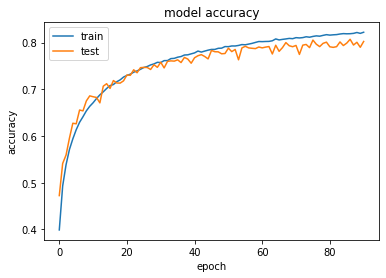

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model3at.save('/content/drive/MyDrive/Garbage/converged_models/LSTM06.h5')

In [22]:
model3.pop()
model1pr = models.Sequential()
model1pr.add(layers.LSTM(50, input_shape = (32, 96), activation = 'tanh', return_sequences = True, recurrent_activation='sigmoid', recurrent_dropout = 0.0, unroll=False ,use_bias=True))
model1pr.add(layers.Dropout(0.15))
model1pr.add(layers.LSTM(96, activation = 'tanh', return_sequences = True,recurrent_activation='sigmoid',recurrent_dropout = 0.0,unroll=False ,use_bias=True))
model1pr.add(model3)
model1pr.add(layers.Dropout(0.25))
model1pr.add(layers.Flatten())
model1pr.add(layers.Dense(50,activation = 'tanh'))
model1pr.add(layers.Dropout(0.04))
model1pr.add(layers.Dense(9,activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5 , decay = 1e-6)
model1pr.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model1pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32, 50)            29400     
                                                                 
 dropout_5 (Dropout)         (None, 32, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32, 96)            56448     
                                                                 
 sequential_5 (Sequential)   (None, 50)                92550     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)               

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)

mc = ModelCheckpoint('/content/drive/MyDrive/1,3,4/model/best_model_8l_normal1pr.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model1pr.fit(data, labels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.22672, saving model to /content/drive/MyDrive/1,3,4/model/best_model_8l_normal1pr.h5
3252/3252 - 60s - loss: 1.8949 - accuracy: 0.2748 - val_loss: 1.9655 - val_accuracy: 0.2267 - 60s/epoch - 18ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.22672 to 0.33037, saving model to /content/drive/MyDrive/1,3,4/model/best_model_8l_normal1pr.h5
3252/3252 - 53s - loss: 1.8405 - accuracy: 0.3023 - val_loss: 1.7318 - val_accuracy: 0.3304 - 53s/epoch - 16ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.33037 to 0.36859, saving model to /content/drive/MyDrive/1,3,4/model/best_model_8l_normal1pr.h5
3252/3252 - 54s - loss: 1.7149 - accuracy: 0.3425 - val_loss: 1.6548 - val_accuracy: 0.3686 - 54s/epoch - 17ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.36859 to 0.40953, saving model to /content/drive/MyDrive/1,3,4/model/best_model_8l_normal1pr.h5
3252/3252 - 53s - loss: 1.6504 - accuracy: 0.3743 - val_loss: 1.631

In [24]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/1,3,4/csv/LSTM07pre.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

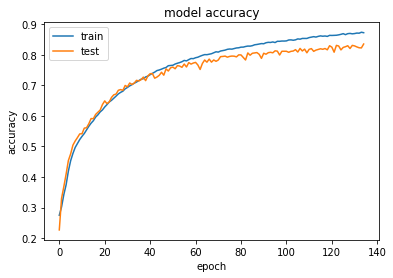

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model1pr.save('/content/drive/MyDrive/1,3,4/converged_models/LSTM07pre.h5')

In [21]:
model3 = models.load_model('/content/drive/MyDrive/1,3,4/model/best_model_4layers.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(data, labels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 15s - loss: 0.3241 - accuracy: 0.8866 - 15s/epoch - 5ms/step
813/813 - 4s - loss: 0.5458 - accuracy: 0.8197 - 4s/epoch - 5ms/step
Train: 0.887, Test: 0.820


**IN CLASS CLASSIFICATION BY USING MODEL3(3 LSTM LAYERS)**




In [20]:
model3 = models.load_model('/content/drive/MyDrive/1,3,4/model/best_model_4layers.h5')
# evaluate the model
_, test_acc = model3.evaluate(itestdata, itestlabels, verbose=2)
print('Test: %.3f' % (test_acc))

3/3 - 2s - loss: 4.9110 - accuracy: 0.3478 - 2s/epoch - 686ms/step
Test: 0.348
